In [5]:
import psutil
import GPUtil
import time
import threading
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def monitor_power_usage(duration, event, result):
    cpu_usage = []
    memory_usage = []
    gpu_usage = []
    gpu_memory_usage = []

    start_time = time.time()
    while not event.is_set():
        cpu_usage.append(psutil.cpu_percent(interval=0.1))
        memory_usage.append(psutil.virtual_memory().percent)
        
        gpus = GPUtil.getGPUs()
        if gpus:
            gpu = gpus[0]
            gpu_usage.append(gpu.load * 100)
            gpu_memory_usage.append(gpu.memoryUtil * 100)
        
        time.sleep(0.1)
    
    result['cpu_usage'] = cpu_usage
    result['memory_usage'] = memory_usage
    result['gpu_usage'] = gpu_usage
    result['gpu_memory_usage'] = gpu_memory_usage

In [9]:
from TTS.api import TTS

def execute_tts_with_monitoring():
    # Initialize result dictionary and event
    result = {}
    event = threading.Event()

    # Start monitoring thread
    monitoring_thread = threading.Thread(target=monitor_power_usage, args=(40, event, result))
    monitoring_thread.start()

    # Execute TTS function
    tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)
    tts.to(0)
    tts.tts(text='Ciao amico mio come stai, io sinceramente non sono più sicuro di essere vivo.', 
            speaker_wav='../backend/input/it.wav', language='it')

    # Stop monitoring thread
    event.set()
    monitoring_thread.join()

    return result

/home/black-mamba/Scrivania/vsCode/TTS/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts
 > Text splitted to sentences.
['Ciao amico mio come stai, io sinceramente non sono più sicuro di essere vivo.']
 > Processing time: 2.1981682777404785
 > Real-time factor: 0.45836747734318306
CPU Usage: [59.7, 52.3, 55.8, 70.2, 64.2, 55.7, 56.3, 61.3, 50.9, 52.5, 60.5, 74.5, 69.9, 58.5, 50.3, 56.1, 52.8, 52.8, 53.4, 71.5, 72.8, 55.6, 50.0, 48.1, 53.7, 45.9, 47.5, 46.5, 44.5, 46.5, 47.2, 46.5, 44.5, 45.7, 42.8, 41.8, 43.8, 52.8, 51.5, 46.8, 60.2, 56.3, 45.1, 65.4, 55.1, 53.0, 47.5, 51.0, 51.9, 48.7, 91.7, 87.3]
Memory Usage: [57.0, 57.0, 57.0, 57.0, 57.0, 57.1, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.1, 57.0, 57.0, 57.0, 57.0, 56.9, 56.9, 56.7, 56.7, 56.7, 56.7, 56.7, 56.6, 57.0, 57.4, 57.4, 57.3, 57.3, 57.4, 57.3, 57.4, 57.3, 57.3, 58.0, 58.7, 61.7, 63.6, 58.0, 58.0, 56.4, 56.5, 56.5, 56.5, 56.5, 56.5, 56.5, 56.6, 56.6]
GPU Usage: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

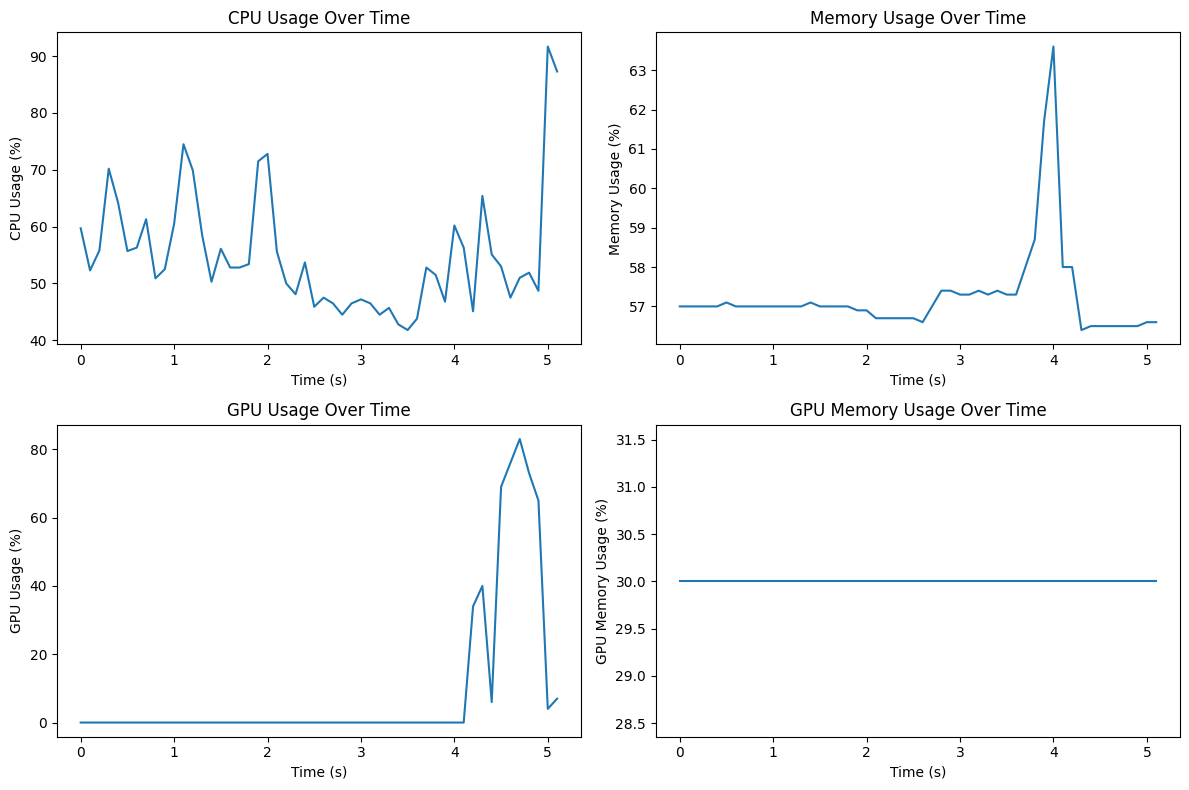

In [12]:
performance_metrics = execute_tts_with_monitoring()

    
# Calculate the x-axis time points
time_points = [i * 0.1 for i in range(len(performance_metrics['cpu_usage']))]

print("CPU Usage:", performance_metrics['cpu_usage'])
print("Memory Usage:", performance_metrics['memory_usage'])
print("GPU Usage:", performance_metrics['gpu_usage'])
print("GPU Memory Usage:", performance_metrics['gpu_memory_usage'])

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_points, performance_metrics['cpu_usage'])
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')

plt.subplot(2, 2, 2)
plt.plot(time_points, performance_metrics['memory_usage'])
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (%)')
plt.title('Memory Usage Over Time')

if performance_metrics['gpu_usage']:
    plt.subplot(2, 2, 3)
    plt.plot(time_points, performance_metrics['gpu_usage'])
    plt.xlabel('Time (s)')
    plt.ylabel('GPU Usage (%)')
    plt.title('GPU Usage Over Time')

    plt.subplot(2, 2, 4)
    plt.plot(time_points, performance_metrics['gpu_memory_usage'])
    plt.xlabel('Time (s)')
    plt.ylabel('GPU Memory Usage (%)')
    plt.title('GPU Memory Usage Over Time')

plt.tight_layout()
plt.show()
